<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-14 18:43:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  69.7MB/s    in 2.9s    

2026-01-14 18:43:08 (69.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


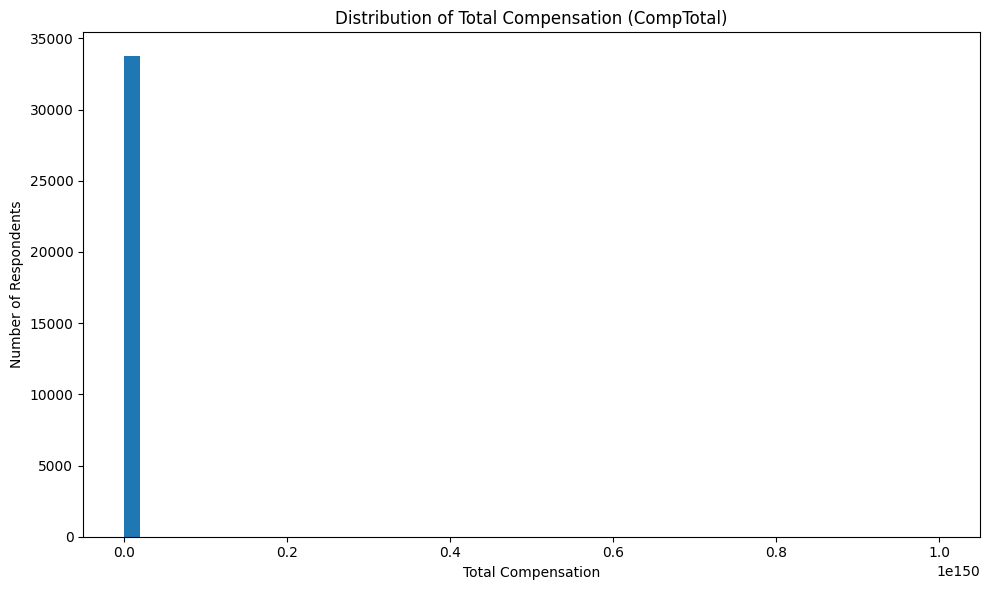

In [9]:
# Histogram of Total Compensation (CompTotal)
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50)
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


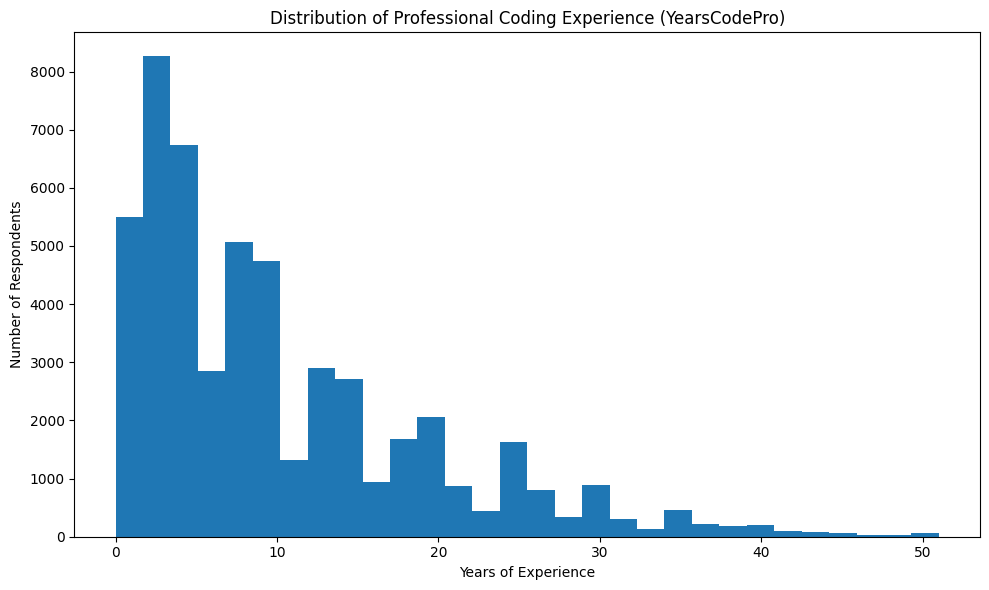

In [10]:
# Histogram of Years of Professional Coding Experience (YearsCodePro)
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

df_exp = pd.read_sql_query(QUERY, conn)

# Convert text values to numeric
df_exp['YearsCodePro'] = df_exp['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10,6))
plt.hist(df_exp['YearsCodePro'].dropna(), bins=30)
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


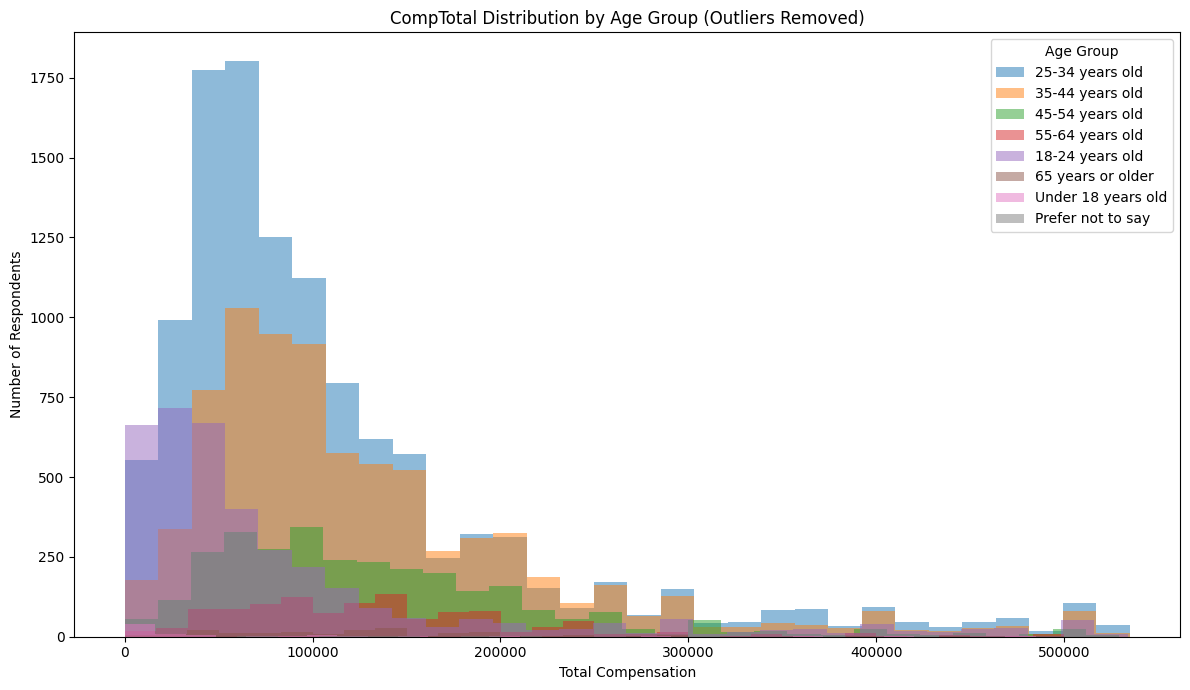

In [11]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL AND CompTotal > 0
"""

df_age_comp = pd.read_sql_query(QUERY, conn)

# Remove extreme outliers using IQR
Q1 = df_age_comp['CompTotal'].quantile(0.25)
Q3 = df_age_comp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
df_age_comp = df_age_comp[df_age_comp['CompTotal'] <= upper_limit]

plt.figure(figsize=(12,7))

for age in df_age_comp['Age'].unique():
    subset = df_age_comp[df_age_comp['Age'] == age]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age)

plt.legend(title='Age Group')
plt.title('CompTotal Distribution by Age Group (Outliers Removed)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


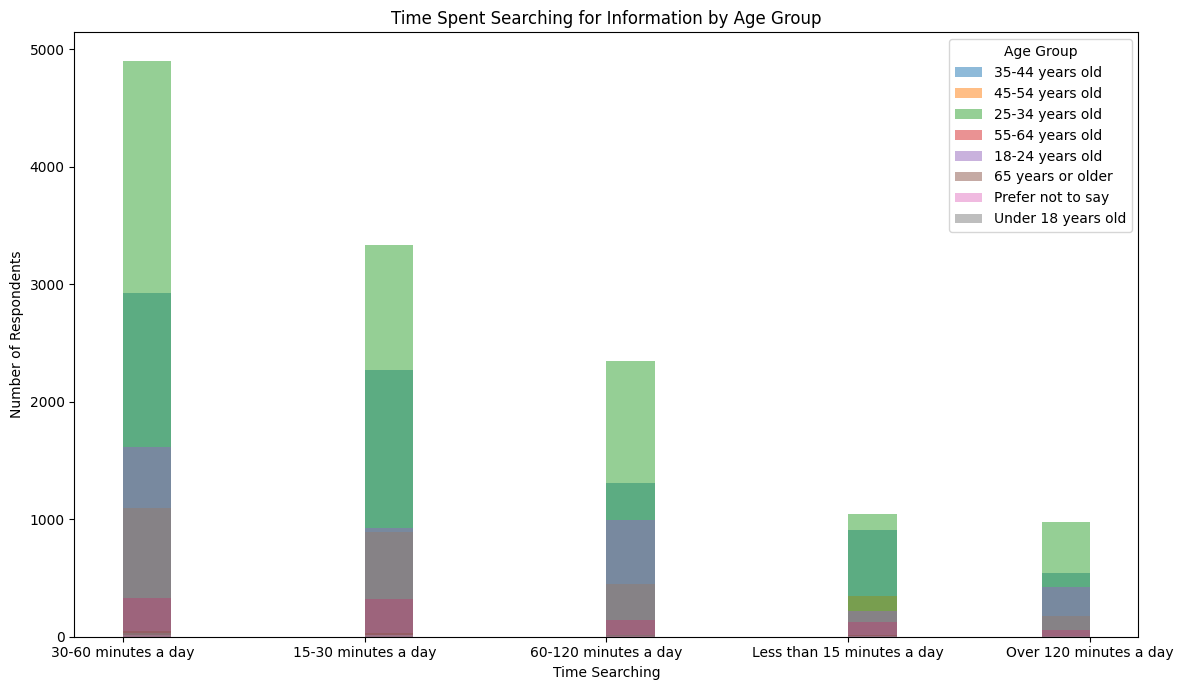

In [12]:
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""

df_time = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12,7))

for age in df_time['Age'].unique():
    subset = df_time[df_time['Age'] == age]
    plt.hist(subset['TimeSearching'], bins=20, alpha=0.5, label=age)

plt.legend(title='Age Group')
plt.title('Time Spent Searching for Information by Age Group')
plt.xlabel('Time Searching')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [19]:
[c for c in df.columns if "Data" in c or "DB" in c]


[]

In [20]:
df.columns.tolist()


['COUNT(*)']

In [23]:
df = pd.read_sql("SELECT * FROM main", conn)
df.shape


(65437, 114)

In [24]:
[c for c in df.columns if "Database" in c]


['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']

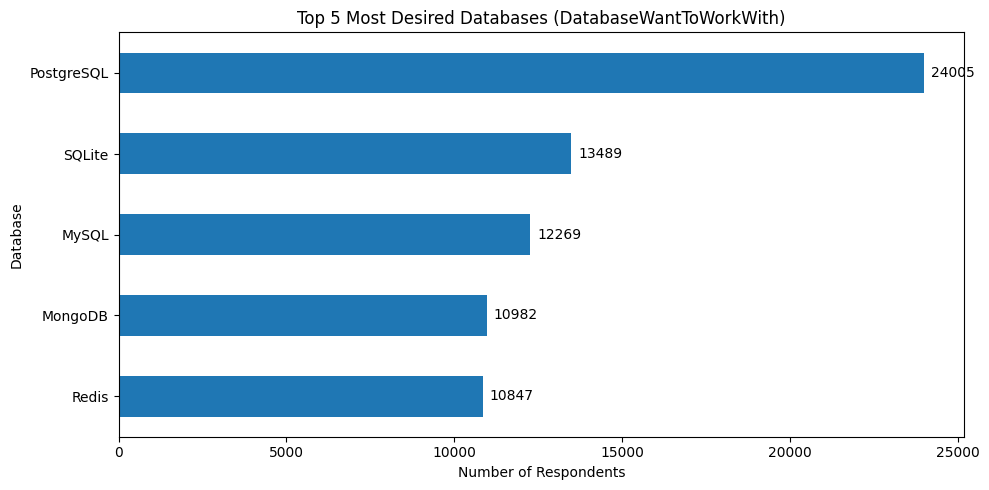

DatabaseWantToWorkWith
Redis         10847
MongoDB       10982
MySQL         12269
SQLite        13489
PostgreSQL    24005
Name: count, dtype: int64

In [29]:
db_want = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().str.strip()
top5_db = db_want.value_counts().head(5).sort_values()

plt.figure(figsize=(10,5))
ax = top5_db.plot(kind='barh')  # horizontal = easier to read
plt.title("Top 5 Most Desired Databases (DatabaseWantToWorkWith)")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")

# add labels on bars
for i, v in enumerate(top5_db.values):
    ax.text(v + 200, i, str(v), va='center')

plt.tight_layout()
plt.show()

top5_db





**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


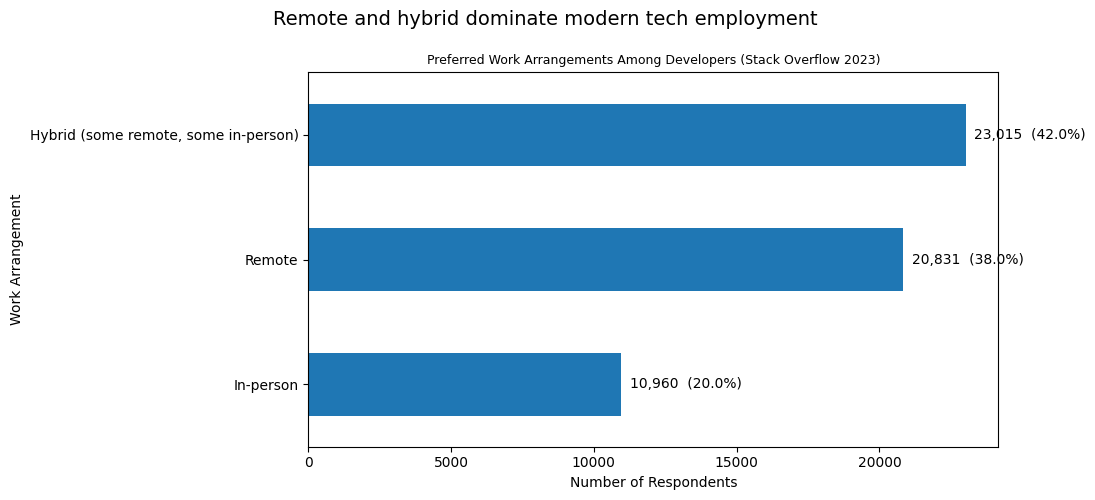

In [39]:
remote_counts = df['RemoteWork'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(11,5))
remote_counts.plot(kind='barh')

total = remote_counts.sum()
for i, v in enumerate(remote_counts):
    pct = (v / total) * 100
    plt.text(v + 300, i, f"{v:,}  ({pct:.1f}%)", va='center')

plt.title("Preferred Work Arrangements Among Developers (Stack Overflow 2023)",
          fontsize=9)
plt.suptitle("Remote and hybrid dominate modern tech employment",
             y=.99, fontsize=14)

plt.xlabel("Number of Respondents")
plt.ylabel("Work Arrangement")
plt.grid(False)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


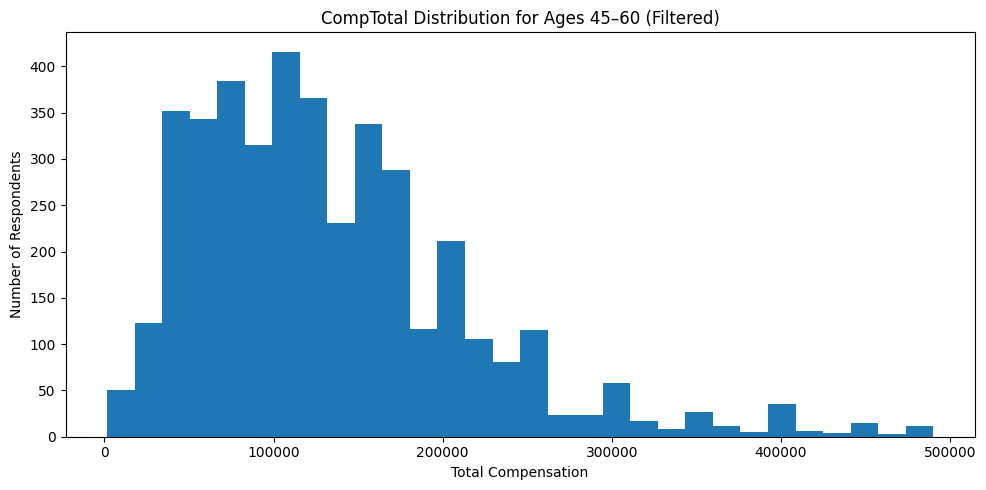

np.float64(120000.0)

In [41]:
# Filter to mid-career age groups (45–60 range in this dataset)
mid_career = df[df['Age'].isin(['45-54 years old', '55-64 years old'])].copy()

# Pull CompTotal and clean it
mid_comp = mid_career['CompTotal'].dropna()

# Keep only realistic compensation values so the histogram is readable
mid_comp = mid_comp[(mid_comp > 1000) & (mid_comp < 500000)]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(mid_comp, bins=30)
plt.title("CompTotal Distribution for Ages 45–60 (Filtered)")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

# Optional: show median of the filtered values
mid_comp.median()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [42]:
job_df = df[['JobSat', 'YearsCodePro']].dropna()

job_df = job_df[job_df['YearsCodePro'] != 'Less than 1 year']
job_df = job_df[job_df['YearsCodePro'] != 'More than 50 years']
job_df['YearsCodePro'] = job_df['YearsCodePro'].astype(int)

# Create experience buckets
job_df['ExperienceGroup'] = pd.cut(
    job_df['YearsCodePro'],
    bins=[0,5,10,20,30,50],
    labels=['0–5','6–10','11–20','21–30','31–50']
)


/tmp/ipykernel_1620/1257159718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_counts = job_df.groupby(['ExperienceGroup','JobSat']).size().unstack().fillna(0)


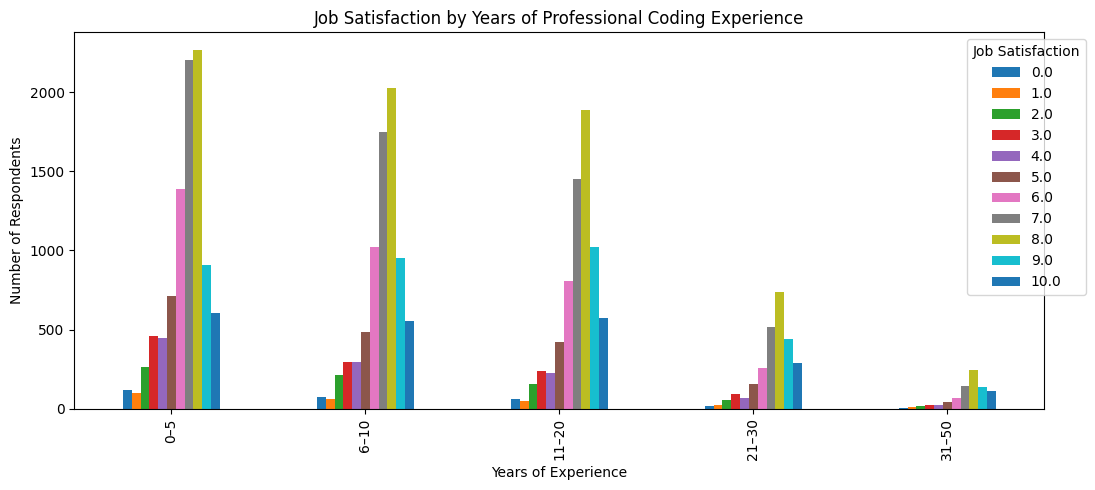

In [43]:
job_counts = job_df.groupby(['ExperienceGroup','JobSat']).size().unstack().fillna(0)

job_counts.plot(kind='bar', figsize=(11,5))
plt.title("Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Number of Respondents")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [45]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
